In [2]:
setwd("~/Upd-Germline-Genomics")

source("_targets.R")

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(GenomicRanges)

Warning message:
“package ‘GenomicRanges’ was built under R version 4.4.1”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.4.1”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.4.1

In [5]:
tar_load(chic.tile.diameter_500_chr)
tar_load(chromosome_pericetromere_label)

subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[372:767] %>%
  reduce() %>%
  ranges()

analyze_loci <- c(
  seqnames(chic.tile.diameter_500_chr) %in% names(chr.lengths)
) %>%
  replace(
    which(seqnames(chic.tile.diameter_500_chr) == "rDNA")[372:767],
    TRUE
  )
seqnames <- seqnames(chic.tile.diameter_500_chr)[analyze_loci] %>%
  droplevels()
seqnames
gr <- chic.tile.diameter_500_chr[analyze_loci]
gr$region <- seqnames %>%
  as.character() %>%
  paste0(
    rep("", length(.)) %>%
      replace(
        to(findOverlaps(chromosome_pericetromere_label, gr)),
        "C"
      )
  )
table(gr$region)
gr$region <- gr$region %>%
  factor(c("2L", "2LC", "2RC", "2R", "3L", "3LC", "3RC", "3R", "4", "X", "Y", "rDNA"))

ERROR while rich displaying an object: Error in dimnames(x)[[2L]] %||% if (do.NULL) NULL else {: could not find function "%||%"

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default

factor-Rle of length 1375880 with 8 runs
  Lengths: 235138 252870 281103 320794  13482 235423  36674    396
  Values :   2L     2R     3L     3R     4      X      Y      rDNA
Levels(8): 2L 2R 3L 3R 4 X Y rDNA


    2L    2LC     2R    2RC     3L    3LC     3R    3RC      4   rDNA      X 
221922  13216 196354  56516 231539  49564 278500  42294  13482    396 235423 
     Y 
 36674 

In [202]:
subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[372:767] %>%
  as.data.frame() %>%
  as_tibble() %>%
  dplyr::slice(c(1, nrow(.)))

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
rDNA,36901,37400,500,*
rDNA,76401,76900,500,*


In [203]:
subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[-c(1:371)] %>%
  as.data.frame() %>%
  as_tibble() %>%
  dplyr::slice(c(1, nrow(.)))

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
rDNA,36901,37400,500,*
rDNA,76687,76973,287,*


In [6]:

tar_load(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  seqnames

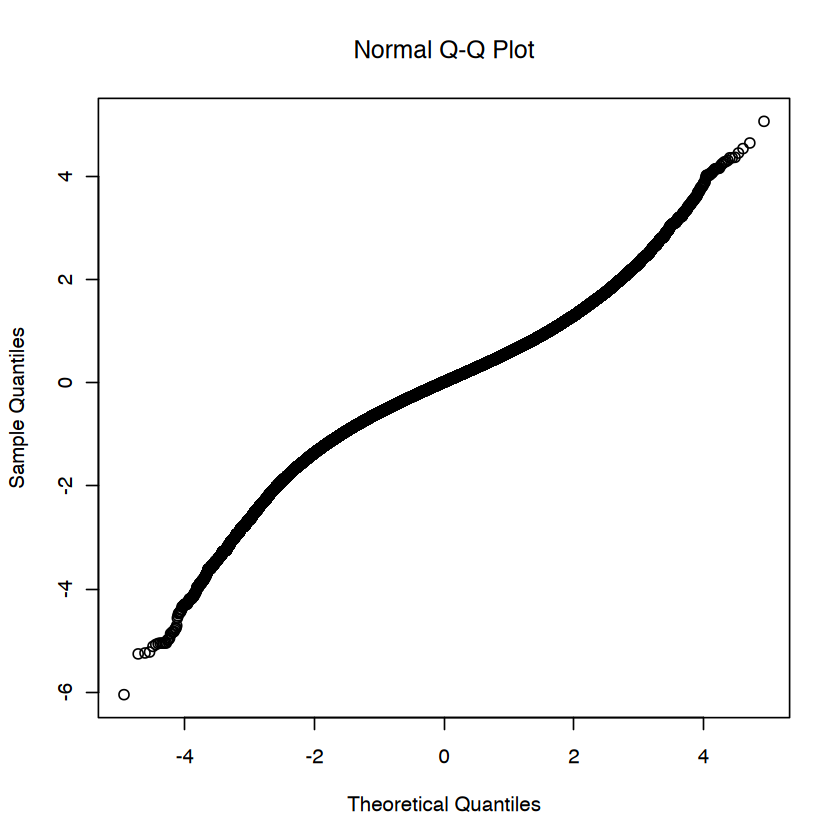

In [34]:
(
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC %>%
    subset(between(abs(.), 1e-6, 9.9))
) %>%
  qqnorm()

In [35]:
tibble(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr$L2FC) %>%
  summarise_all(list(mean, sd))

fn1,fn2
<dbl>,<dbl>
0.01492165,0.9527016


In [7]:
write(deparse(arm.colors), stdout())
arm.colors <- c(
  "2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B",  "3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100",  "4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF",
  rDNA = "#79d2ff"
)
write(deparse(arm.colors), stdout())

c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF")
c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF", rDNA = "#79d2ff"
)


In [8]:
data <- with(
  elementMetadata(gr),
  list(
    H3K4 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K27 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K9 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr$L2FC,
    )
  )
)

In [70]:
library(ggplot2)
gg <- ggplot(data$H3K4, aes(GSC, CySC, color=region)) +
  geom_point(shape = ".", data = \(data) data %>% subset(region %in% levels(region)[1:8]), color = "#cccccc") +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "4"), color = arm.colors["4"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "X"), color = arm.colors["X"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "Y"), color = arm.colors["Y"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "rDNA"), color = arm.colors["rDNA"]) +
  scale_x_continuous(limits = c(-5, 5), expand=c(0, 0)) +
  scale_y_continuous(limits = c(-5, 5), expand=c(0, 0)) +
  theme(
    aspect.ratio = 1,
  )

Warning message:
"Removed 10543 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 103 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 2736 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 3566 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 57 rows containing missing values or values outside the scale range
(`geom_point()`)."


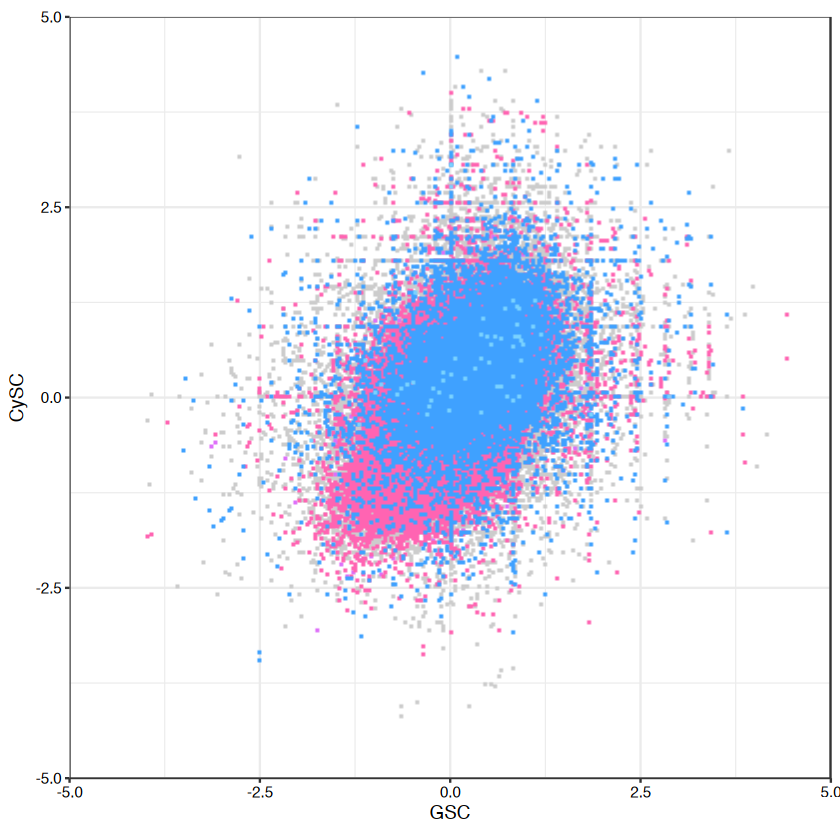

In [65]:
library(ggrastr)
rasterise(gg, dpi=60)

In [177]:
library(ggplot2)
limits <- c(-2.5, 2.5)
gg <- ggplot(data$H3K9, aes(GSC, CySC)) +
  geom_point(data = \(data) data %>% dplyr::slice(sample(nrow(data), round(nrow(data) * 0.2))), size = 0.05, stroke = NA) +
  stat_ellipse(aes(color = region), data = \(data) data %>% subset(between(abs(GSC), 1e-6, 9.9) & between(abs(CySC), 1e-6, 9.9)), type = "norm", level = 0.5, linewidth = 1 * 25.4 / 72) +
  # stat_ellipse(aes(color = region), data = \(data) data %>% subset(between(abs(GSC), 1e-6, 9.9) & between(abs(CySC), 1e-6, 9.9) & !str_ends(region, "L|R")), level = 0.75, alpha = 0.5) +
  # stat_ellipse(aes(color = region), data = \(data) data %>% subset(between(abs(GSC), 1e-6, 9.9) & between(abs(CySC), 1e-6, 9.9) & !str_ends(region, "L|R")), level = 0.95, alpha = 0.25) +
  scale_color_manual(values = arm.colors) +
  annotate(
    "segment",
    c(-Inf, 0),
    c(0, -Inf),
    xend = c(Inf, 0),
    yend = c(0, Inf),
    color = "#990000",
    linewidth = 0.5 * 25.4 / 72,
  ) +
  scale_x_continuous(limits = c(-5, 5)) +
  scale_y_continuous(limits = c(-5, 5)) +
  coord_cartesian(limits, limits, expand=F) +
  theme(
    aspect.ratio = 1,
  )

In [178]:
ggsave("illustrations/ChromatinCellTypeScatter1.pdf", set_panel_size(rasterise(gg, dpi=300), w=unit(1.5,"in"), h=unit(1.5,"in")), w=3, h=3)

Warning message:
“Removed 3408 rows containing missing values (`geom_point()`).”


In [168]:
file.size("illustrations/ChromatinCellTypeScatter1.pdf")

[1] 75027

Warning message:
“Removed 3454 rows containing missing values (`geom_point()`).”


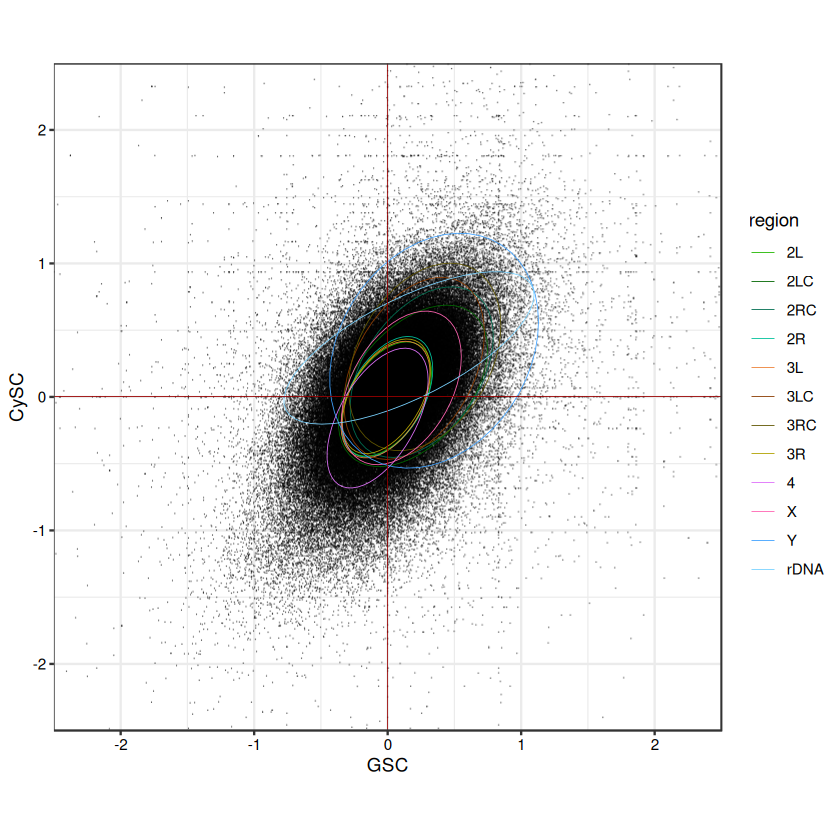

In [169]:
library(ggrastr)
rasterise(gg, dpi=120)

In [141]:
summary(gg$data)

     region            GSC                 CySC           
 3R     :278500   Min.   :-10.00000   Min.   :-10.000000  
 X      :235423   1st Qu.: -0.14329   1st Qu.: -0.189012  
 3L     :231539   Median :  0.01275   Median :  0.007781  
 2L     :221922   Mean   :  0.02092   Mean   :  0.014922  
 2R     :196354   3rd Qu.:  0.21779   3rd Qu.:  0.263555  
 2RC    : 56516   Max.   : 10.00000   Max.   : 10.000000  
 (Other):155626                                           

Warning message:
“Removed 548 rows containing missing values (`geom_point()`).”


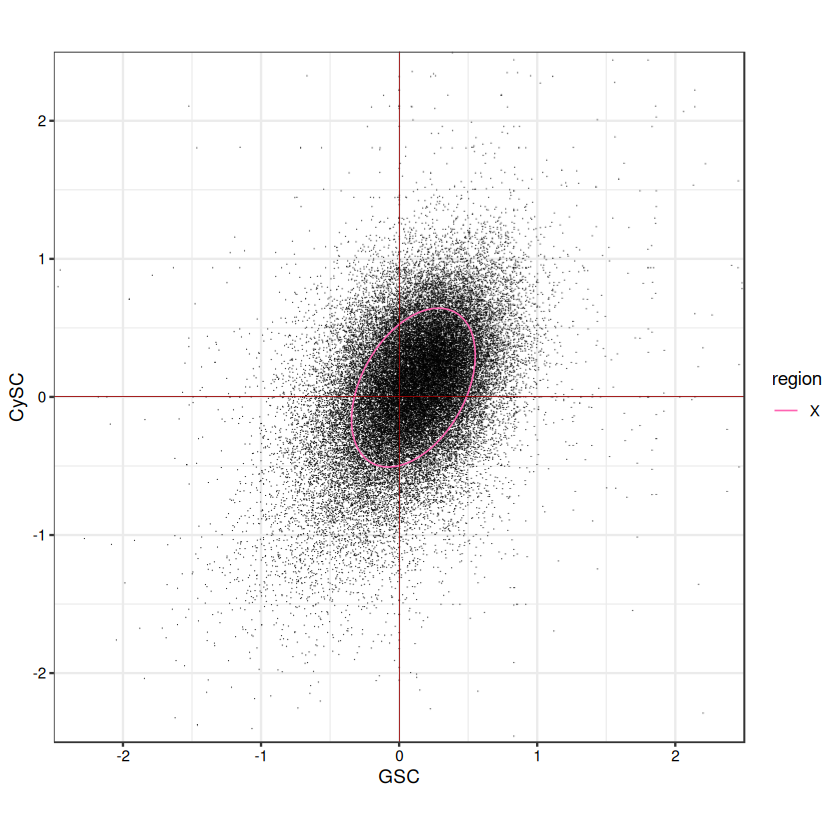

In [179]:
library(ggrastr)
gg2 <- gg
gg2$data <- gg$data %>% subset(region == "X")
rasterise(gg2, dpi=120)

In [180]:
library(egg)
library(gtable)
graph_ecdf <- function(v, flip=F) {
  gg <- gg + theme(legend.position = "none")
  ecdf <- ecdf(subset(v, abs(v) >= 1e-6))
  ecdf <- tibble(
    x = seq(limits[1], limits[2], length.out = 100),
    y = ecdf(x),
  )
  pdf <- diff(ecdf$y) / diff(head(ecdf$x, 2))
  plotdata <- tibble(
    x = c(limits[1], ecdf$x, limits[2]),
    y = c(0, head(pdf, 1), (pdf[-1] + pdf[-length(pdf)]) / 2, tail(pdf, 1), 0),
  )
  ggplot(plotdata, aes(x, -y)) +
    geom_polygon(fill = NA, color = "black", linewidth = 0.5 * 25.4 / 72) +
    annotate(
      "segment",
      0, 0,
      xend = 0,
      yend = -approx((ecdf$x[-1] + ecdf$x[-length(ecdf$x)]) / 2, pdf, xout=0)$y,
      color = "#990000",
      linewidth = 0.5 * 25.4 / 72
    ) +
    list(coord_cartesian, coord_flip)[[1+flip]](
      limits,
      c(-max(pdf) * 1.5, 0),
      expand = FALSE
    ) +
    theme_void()
}
grob_ecdf <- function(gg, w, h) {
  gr <- set_panel_size(gg, w=w, h=h)
  x <- ggplotGrob(graph_ecdf(gg$data$GSC, flip=F))
  lft <- ggplotGrob(graph_ecdf(gg$data$CySC, flip=T))
  gr$widths[3] <- unit(24, "pt")
  gr$heights[9] <- unit(24, "pt")
  gr %>%
    gtable_add_grob(
      lft$grobs[[match("panel", lft$layout$name)]],
      l = 1,
      t = 7
    ) %>%
    gtable_add_grob(
      x$grobs[[match("panel", x$layout$name)]],
      l = 5,
      t = 12
    )
}

In [181]:
gr$heights

 [1] 5.5points                    0cm                         
 [3] 0cm                          0cm                         
 [5] 0cm                          0cm                         
 [7] 1null                        sum(2.75points, 1grobheight)
 [9] 1grobheight                  0cm                         
[11] 0points                      5.5points                   

Warning message:
“Removed 3342 rows containing missing values (`geom_point()`).”


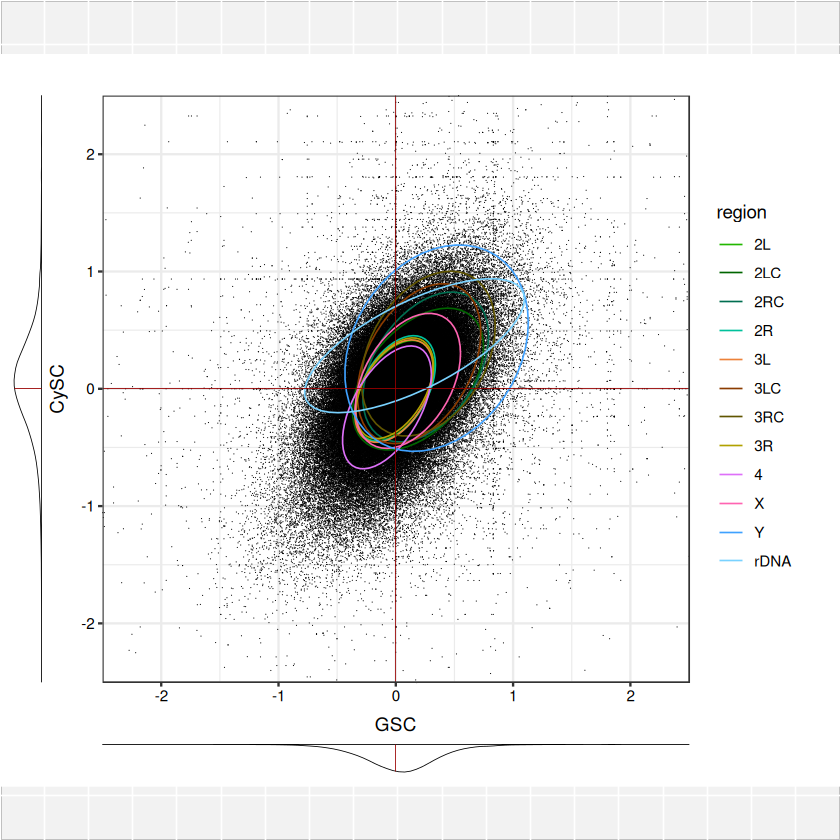

In [182]:
plot(grob_ecdf(gg + theme(plot.margin = margin(25, 25, 25, 25)), w=unit(1,"null"), h=unit(1,"null")))

In [183]:
Y <- ggplot(data.frame(x=1,y=1), aes(x,y)) + geom_point() + labs(title="Y")
Y$labels

$title
[1] "Y"

$x
[1] "x"

$y
[1] "y"

In [184]:
set.seed(0)

size <- unit(1.5,"in")
cdfsize <- 24
gg <- gg + theme(plot.margin = margin(5.5, 5.5, cdfsize, cdfsize))
dpi <- 300
gg$data <- data$H3K4
report <- grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K4me3") + theme(legend.position = "none"), w=size, h=size)
gg$data <- gg$data %>% subset(region == "X")
report <- report %>%
  rbind(
    grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K4me3: X facet") + theme(legend.position = "none"), w=size, h=size)
  )
gg$data <- data$H3K27
report <- report %>%
  cbind(
    rbind(
      grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K27me3") + theme(legend.position = "none"), w=size, h=size),
      {
        gg$data <- gg$data %>% subset(region == "X")
        grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K27me3: X facet") + theme(legend.position = "none"), w=size, h=size)
      }
    )
  )
gg$data <- data$H3K9
report <- report %>%
  cbind(
    rbind(
      grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K9me3") + theme(legend.position = "none"), w=size, h=size),
      {
        gg$data <- gg$data %>% subset(region == "X")
        grob_ecdf(rasterise(gg, dpi=dpi) + labs(title="H3K9me3: X facet") + theme(legend.position = "none"), w=size, h=size)
      }
    )
  )
report <- gtable(
  unit(c(7.5, 2.5), "in"),
  unit(6, "in")
) %>%
  gtable_add_grob(
    list(report, cowplot::get_legend(gg)),
    t = 1,
    l = 1:2
  )

Warning message:
“Removed 10 rows containing non-finite values (`stat_ellipse()`).”
Warning message:
“Removed 5097 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_ellipse()`).”
Warning message:
“Removed 746 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 120 rows containing non-finite values (`stat_ellipse()`).”
Warning message:
“Removed 4643 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 24 rows containing non-finite values (`stat_ellipse()`).”
Warning message:
“Removed 671 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3464 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 563 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3408 rows containing missing values (`geom_point()`).”


In [185]:
pdf("illustrations/ChromatinCellTypeScatter.pdf", w=11, h=8.5)
grid::grid.draw(report)
dev.off()

png 
  2

In [186]:
file.size("illustrations/ChromatinCellTypeScatter.pdf")

[1] 522147

In [194]:
library(matrixStats)
data$H3K9[2:3] %>%
  subset(between(abs(GSC), 1e-6, 9.9) & between(abs(CySC), 1e-6, 9.9)) %>%
  reframe(across(everything(), sign)) %>%
  with(table(GSC, CySC))

    CySC
GSC      -1      1
  -1 346588 210871
  1  222701 479260